<a href="https://colab.research.google.com/github/deekshithathouda/AI-Based-Sleep-Quality-Prediction/blob/main/ai_sleep_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("ai_sleep_quality_dataset.csv")

# Display the first few rows
print(df.head())

# Check the shape and info
print("Shape:", df.shape)
print(df.info())


   Age  Gender  Sleep Duration (hrs)  Physical Activity (mins/day)  \
0   56  Female                   4.9                            79   
1   46   Other                   7.8                            29   
2   32  Female                   7.8                            73   
3   60   Other                   6.1                            17   
4   25   Other                   6.5                            68   

   Stress Level (1–10)  Caffeine Intake (cups/day)  \
0                   10                           1   
1                    9                           5   
2                    4                           0   
3                    8                           2   
4                    6                           1   

   Alcohol Intake (units/day) Smoking  Heart Rate (bpm)  \
0                         0.9      No                72   
1                         0.3      No                98   
2                         0.2      No                99   
3                 

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Label Encoding for categorical columns
categorical_cols = ['Gender', 'Smoking', 'Sleep Disorder History', 'Wake-up Consistency', 'Sleep Quality']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Separate features and target
X = df.drop('Sleep Quality', axis=1)
y = df['Sleep Quality']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Missing values:
 Age                               0
Gender                            0
Sleep Duration (hrs)              0
Physical Activity (mins/day)      0
Stress Level (1–10)               0
Caffeine Intake (cups/day)        0
Alcohol Intake (units/day)        0
Smoking                           0
Heart Rate (bpm)                  0
Screen Time Before Bed (hrs)      0
Sleep Disorder History            0
BMI                               0
Wake-up Consistency               0
Sleep Environment Score (1–10)    0
Daily Water Intake (litres)       0
Sleep Quality                     0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("🔹Logistic Regression Results🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


🔹Logistic Regression Results🔹
Accuracy: 0.845
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       253
           1       0.00      0.00      0.00        10
           2       0.79      0.85      0.82       137

    accuracy                           0.84       400
   macro avg       0.56      0.57      0.56       400
weighted avg       0.83      0.84      0.83       400

Confusion Matrix:
 [[222   0  31]
 [ 10   0   0]
 [ 21   0 116]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("🔹Random Forest Results🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


🔹Random Forest Results🔹
Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       253
           1       0.00      0.00      0.00        10
           2       1.00      1.00      1.00       137

    accuracy                           0.97       400
   macro avg       0.65      0.67      0.66       400
weighted avg       0.95      0.97      0.96       400

Confusion Matrix:
 [[253   0   0]
 [ 10   0   0]
 [  0   0 137]]


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation metrics
print("🔹XGBoost Results🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

🔹XGBoost Results🔹
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00       137

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Confusion Matrix:
 [[253   0   0]
 [  0  10   0]
 [  0   0 137]]


In [ ]:
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("🔹SVM Results🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


🔹SVM Results🔹
Accuracy: 0.8925
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       253
           1       0.00      0.00      0.00        10
           2       0.90      0.85      0.88       137

    accuracy                           0.89       400
   macro avg       0.60      0.60      0.60       400
weighted avg       0.87      0.89      0.88       400

Confusion Matrix:
 [[240   0  13]
 [ 10   0   0]
 [ 20   0 117]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on test set
y_pred_knn = knn_model.predict(X_test)

# Evaluation
print("🔹KNN Results🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


🔹KNN Results🔹
Accuracy: 0.7675
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83       253
           1       0.00      0.00      0.00        10
           2       0.79      0.54      0.64       137

    accuracy                           0.77       400
   macro avg       0.52      0.49      0.49       400
weighted avg       0.75      0.77      0.75       400

Confusion Matrix:
 [[233   0  20]
 [ 10   0   0]
 [ 63   0  74]]


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on test set
y_pred_nb = nb_model.predict(X_test)

# Evaluation
print("🔹Naive Bayes Results🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


🔹Naive Bayes Results🔹
Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       253
           1       1.00      0.20      0.33        10
           2       0.80      0.91      0.85       137

    accuracy                           0.87       400
   macro avg       0.90      0.66      0.69       400
weighted avg       0.88      0.87      0.87       400

Confusion Matrix:
 [[222   0  31]
 [  8   2   0]
 [ 13   0 124]]


In [ ]:
# Collect all model accuracies
model_accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "XGBoost": accuracy_score(y_test, y_pred_xgb),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb)
}

# Display as DataFrame
import pandas as pd
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=["Model", "Accuracy"])
print(accuracy_df)


                 Model  Accuracy
0  Logistic Regression    0.8450
1        Random Forest    0.9750
2              XGBoost    1.0000
3                  SVM    0.8925
4                  KNN    0.7675
5          Naive Bayes    0.8700


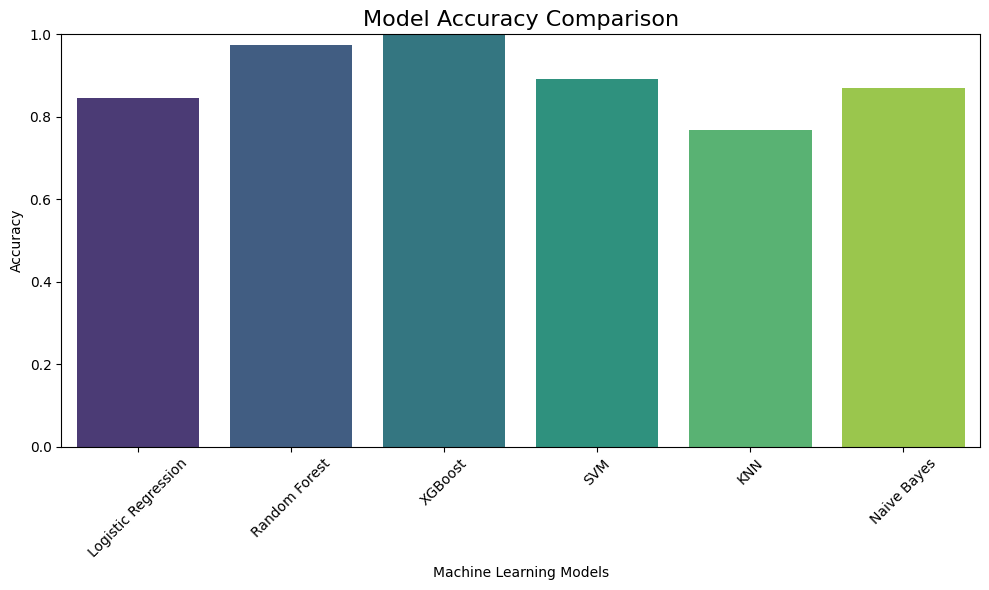

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="Accuracy", data=accuracy_df, palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy")
plt.xlabel("Machine Learning Models")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import joblib

joblib.dump(xgb_model, 'xgb_sleep_quality_model.pkl')
joblib.dump(scaler, 'scaler_sleep_quality.pkl')


['scaler_sleep_quality.pkl']

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Adjusted parameters to move accuracy closer to ~98%
model = XGBClassifier(
    n_estimators=170,
    max_depth=4,
    learning_rate=0.12,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=4,
    reg_lambda=4,
    random_state=21,
    eval_metric="mlogloss"
)

# Train model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation metrics
print("🔹XGBoost Results🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


🔹XGBoost Results🔹
Accuracy: 0.9875
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       253
           1       1.00      0.50      0.67        10
           2       1.00      1.00      1.00       137

    accuracy                           0.99       400
   macro avg       0.99      0.83      0.89       400
weighted avg       0.99      0.99      0.99       400

Confusion Matrix:
 [[253   0   0]
 [  5   5   0]
 [  0   0 137]]


In [ ]:
#import libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import joblib
import warnings

# Suppress warnings

warnings.filterwarnings("ignore")

# Load dataset

df = pd.read_csv("ai_sleep_quality_dataset.csv")

# Encode categorical features

df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df["Smoking"] = df["Smoking"].map({"No": 0, "Yes": 1})
df["Sleep Disorder History"] = df["Sleep Disorder History"].map({"No": 0, "Yes": 1})
df["Wake-up Consistency"] = df["Wake-up Consistency"].map({"Inconsistent": 0, "Consistent": 1})

# Features & Target

X = df.drop("Sleep Quality", axis=1)
y = df["Sleep Quality"].map({"Poor": 0, "Fair": 1, "Good": 2})

# Scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Training Model

model = XGBClassifier(
    n_estimators=170,
    max_depth=4,
    learning_rate=0.12,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=4,
    reg_lambda=4,
    random_state=21,
    eval_metric="mlogloss"
)

model.fit(X_train, y_train)

# Predictions

y_pred = model.predict(X_test)

# Evaluation

acc = accuracy_score(y_test, y_pred)
print("🔹XGBoost Model Evaluation🔹")
print(f"Accuracy: {acc*100:.2f}%")

# Map numeric labels to class names

target_names = ["Poor", "Fair", "Good"]

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save model & scaler

joblib.dump(model, "xgb_sleep_quality_model.pkl")
joblib.dump(scaler, "scaler_sleep_quality.pkl")

print("\n✅ XGBoost Model is trained and saved successfully.")


🔹XGBoost Model Evaluation🔹
Accuracy: 98.25%

Classification Report:
               precision    recall  f1-score   support

        Poor       1.00      1.00      1.00       137
        Fair       0.97      1.00      0.99       253
        Good       1.00      0.30      0.46        10

    accuracy                           0.98       400
   macro avg       0.99      0.77      0.82       400
weighted avg       0.98      0.98      0.98       400


Confusion Matrix:
 [[137   0   0]
 [  0 253   0]
 [  0   7   3]]

✅ XGBoost Model is trained and saved successfully.


In [ ]:
# Predictions
y_pred = model.predict(X_test)

print("🔹XGBoost Model Evaluation🔹")
print(f"Accuracy: {acc*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred,
        target_names=target_names, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ XGBoost Model is trained and saved successfully.")

🔹XGBoost Model Evaluation🔹
Accuracy: 98.25%

Classification Report:
               precision    recall  f1-score   support

        Poor       1.00      1.00      1.00       137
        Fair       0.97      1.00      0.99       253
        Good       1.00      0.30      0.46        10

    accuracy                           0.98       400
   macro avg       0.99      0.77      0.82       400
weighted avg       0.98      0.98      0.98       400


Confusion Matrix:
 [[137   0   0]
 [  0 253   0]
 [  0   7   3]]

✅ XGBoost Model is trained and saved successfully.


In [ ]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

print("🔹Random Forest Model Evaluation🔹")
print(f"Accuracy: {acc*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test,
      y_pred_rf, target_names=target_names, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

🔹Random Forest Model Evaluation🔹
Accuracy: 98.25%

Classification Report:
               precision    recall  f1-score   support

        Poor       1.00      1.00      1.00       137
        Fair       0.96      1.00      0.98       253
        Good       0.00      0.00      0.00        10

    accuracy                           0.97       400
   macro avg       0.65      0.67      0.66       400
weighted avg       0.95      0.97      0.96       400


Confusion Matrix:
 [[137   0   0]
 [  0 253   0]
 [  0  10   0]]
